## 前言

### 英雄聯盟簡介

英雄聯盟是由 Roit Games 於 2009 年發行的 5v5 多人線上戰鬥技術型（MOBA）遊戲。遊戲中分為藍方陣營、紅方陣營，玩家須操控「英雄」與敵方陣營進行對抗，並摧毀敵方的主堡（Nexus）以獲得勝利。英雄在每場遊戲開始時都比較弱，他們會隨著遊戲進展，透過擊殺小兵、野怪、敵方英雄以獲得升級、金錢。

### 研究目標及設立假說

該專案的研究目標為找出對藍方陣營而言，獲勝最關鍵的因子，以協助玩家們調整遊戲前期的遊玩策略（遊戲前 15 分鐘）。本專案列出下列五點主要的研究假說：

* 假說一：藍方陣營獲得金幣數量（blueGold）會正面影響藍方陣營勝利。
* 假說二：吃兵數（blueMinionsKilled）會正面影響藍方陣營勝利。
* 假說三：藍方陣營英雄擊殺數（blueChampKills）會正面影響藍方陣營勝利。
* 假說四：諭示者（blueHeraldKills）會正面影響藍方陣營勝利。
* 假說五：防禦塔摧毀數量（blueTowersDestroyed）會正面影響藍方陣營勝利。



## 資料集說明

* 資料集取自 Kaggle，該資料集提供每場遊戲前 15 分鐘的隊伍數據，以及該場遊戲最終的勝負結果。共 16 個自變數。
* 網址：https://www.kaggle.com/datasets/benfattori/league-of-legends-diamond-games-first-15-minutes

【應變數】

* blue_win：1 代表藍方陣營獲勝， 0 則代表藍方陣營戰敗。

【自變數】

* blueGold：藍方陣營獲得金幣數。

* blueMinionsKilled：藍方陣營小兵擊殺數。

* blueJungleMinionsKilled：藍方陣營之打野小兵擊殺數。

* blueAvgLevel：藍方陣營平均等級。

* redGold：紅方陣營獲得金幣數。

* redMinionsKilled：紅方陣營小兵擊殺數。

* redJungleMinionsKilled：紅方陣營之打野小兵擊殺數。

* redAvgLevel：紅方陣營平均等級。

* blueChampKills：藍方陣營英雄擊殺次數。

* blueHeraldKills：藍方陣營諭示者擊殺次數。（諭示者可協助隊伍更快地摧毀敵方防禦塔）

* blueDragonKills：藍方陣營小龍擊殺次數。

* blueTowersDestroyed：藍方陣營防禦塔摧毀數量。

* redChampKills：紅方陣營英雄擊殺次數。

* redHeraldKills：紅方陣營諭示者擊殺次數。（諭示者可協助隊伍更快地摧毀敵方防禦塔）

* redDragonKills：紅方陣營小龍擊殺次數。

* redTowersDestroyed：紅方陣營防禦塔摧毀數量。

## 匯入套件

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn.linear_model as lm
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score, precision_score, recall_score)
import numpy as np

## 載入資料

In [19]:
df = pd.read_csv("MatchTimelinesFirst15.csv")
df.head()

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
0,0,24575,349,89,8.6,25856,346,80,9.2,6,1,0,1,12,2,0,1
1,0,27210,290,36,9.0,28765,294,92,9.4,20,0,0,0,19,2,0,0
2,1,32048,346,92,9.4,25305,293,84,9.4,17,3,0,0,11,0,0,4
3,0,20261,223,60,8.2,30429,356,107,9.4,7,0,0,3,16,3,0,0
4,1,30217,376,110,9.8,23889,334,60,8.8,16,3,0,0,8,0,0,2


## EDA



檢查缺失值：該資料集並無缺失值，不需做額外處理



In [20]:
df.isnull().sum()

blue_win                   0
blueGold                   0
blueMinionsKilled          0
blueJungleMinionsKilled    0
blueAvgLevel               0
redGold                    0
redMinionsKilled           0
redJungleMinionsKilled     0
redAvgLevel                0
blueChampKills             0
blueHeraldKills            0
blueDragonKills            0
blueTowersDestroyed        0
redChampKills              0
redHeraldKills             0
redDragonKills             0
redTowersDestroyed         0
dtype: int64

描述性統計量：初步檢查各變數是否存在異常值
* 由下表可發現，該資料集共有 48651 筆資料，而 blueDragonKills 和 redDragonKills 的數值皆為 0 ，此應屬異常數值，故在本專案不討論小龍擊殺數量對藍方陣營勝利的影響。（後續將移除這兩個欄位）

In [21]:
df.describe()

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueDragonKills,blueTowersDestroyed,redChampKills,redHeraldKills,redDragonKills,redTowersDestroyed
count,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.000000,48651.0,48651.000000,48651.000000,48651.000000,48651.0,48651.000000
mean,0.505416,26349.160572,335.859140,83.136585,9.172251,26203.028591,336.693984,84.692997,9.174759,11.013155,1.316355,0.0,0.794084,10.747693,1.287188,0.0,0.891657
std,0.499976,2777.299868,32.673096,14.794947,0.413735,2754.709425,33.278962,14.902326,0.421396,4.532898,0.956784,0.0,1.054556,4.453358,0.952450,0.0,1.111205
min,0.000000,15930.000000,120.000000,0.000000,5.400000,11133.000000,14.000000,1.000000,2.400000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,24401.500000,315.000000,73.000000,9.000000,24301.000000,316.000000,75.000000,9.000000,8.000000,1.000000,0.0,0.000000,8.000000,1.000000,0.0,0.000000
50%,1.000000,26167.000000,337.000000,83.000000,9.200000,26029.000000,338.000000,84.000000,9.200000,11.000000,1.000000,0.0,1.000000,10.000000,1.000000,0.0,1.000000
75%,1.000000,28126.000000,358.000000,92.000000,9.400000,27940.000000,359.000000,94.000000,9.400000,14.000000,2.000000,0.0,1.000000,14.000000,2.000000,0.0,1.000000
max,1.000000,39769.000000,455.000000,164.000000,10.800000,39999.000000,457.000000,160.000000,10.600000,50.000000,4.000000,0.0,11.000000,43.000000,4.000000,0.0,10.000000


檢視應變數分布：此資料集應變數相當平衡，贏的場次（1）與輸的場次（0）數量並沒有相差太多

AxesSubplot(0.125,0.125;0.775x0.755)


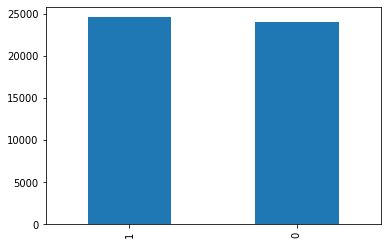

In [22]:
print(df['blue_win'].value_counts().plot(kind='bar'))

## 共線性檢定

將 blueDragonKills 和 redDragonKills 兩變數刪除。（其值皆為 0 ）

In [23]:
df = df.drop("blueDragonKills", axis = 1)
df = df.drop("redDragonKills", axis = 1)

相關係數：若大於 0.7 代表兩變數之間可能存在共線性

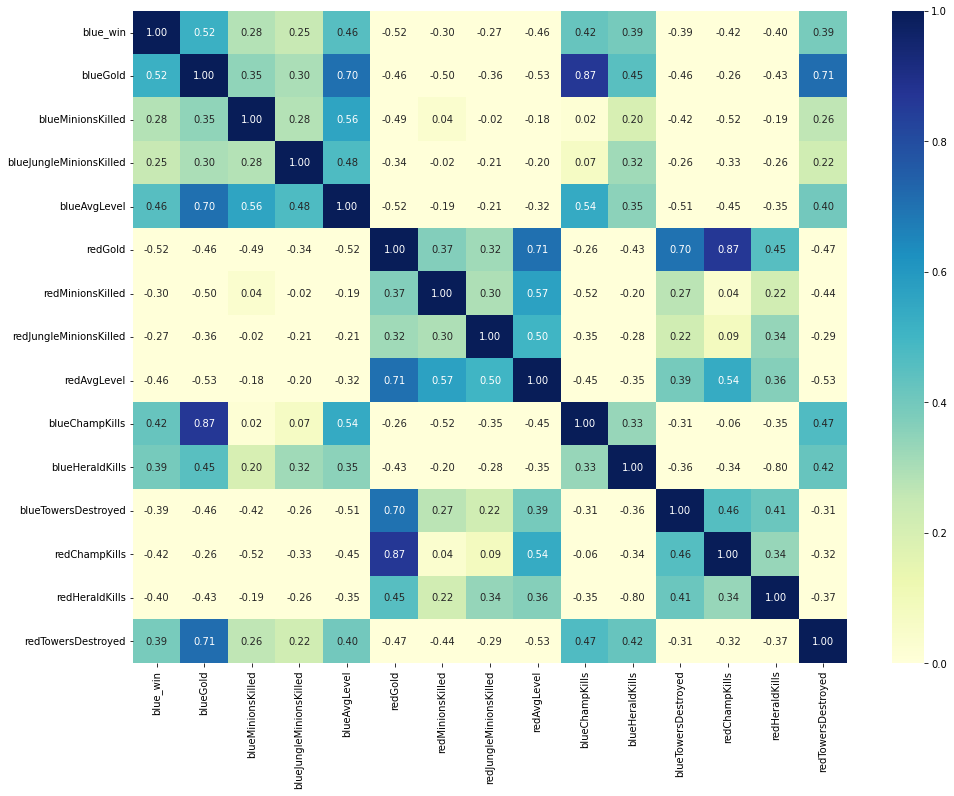

In [24]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

* 變異數膨脹係數（VIF）：若 VIF 大於 10 代表該變數與其他變數之間存在共線性。若存在共線性，可能影響 (1) 迴歸係數出現不顯著的結果; (2) 迴歸係數正負向關係與預期的相反。
* 在此專案中，已將各自變數先進行標準化，以減緩共線性問題。

In [25]:
df2 = df.apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df2[1:].head()

,blue_win,blueGold,blueMinionsKilled,blueJungleMinionsKilled,blueAvgLevel,redGold,redMinionsKilled,redJungleMinionsKilled,redAvgLevel,blueChampKills,blueHeraldKills,blueTowersDestroyed,redChampKills,redHeraldKills,redTowersDestroyed
1,-1.010881,0.309956,-1.403575,-3.185992,-0.416333,0.930033,-1.282912,0.490326,0.534511,1.982583,-1.375812,-0.753003,1.853053,0.748398,-0.802423
2,0.989216,2.051935,0.310373,0.599084,0.550470,-0.325998,-1.312961,-0.046503,0.534511,1.320754,1.759691,-0.753003,0.056656,-1.351449,2.797271
3,-1.010881,-2.192115,-3.454192,-1.563817,-2.349938,1.534090,0.580127,1.496881,0.534511,-0.885340,-1.375812,2.091795,1.179404,1.798321,-0.802423
4,0.989216,1.392662,1.228560,1.815715,1.517273,-0.840026,-0.080952,-1.656989,-0.889327,1.100145,1.759691,-0.753003,-0.616994,-1.351449,0.997424
5,0.989216,-0.316552,0.800073,-0.076823,0.067069,-1.215021,-0.531687,0.087705,-0.889327,-0.444121,-0.330644,-0.753003,-0.841543,-0.301526,-0.802423


In [26]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(df2.values, i) for i in range(df2.shape[1])]
vif["features"] = df2.columns

In [27]:
vif[1:].round(1)

,VIF Factor,features
1,18.1,blueGold
2,2.9,blueMinionsKilled
3,1.8,blueJungleMinionsKilled
4,3.6,blueAvgLevel
5,18.5,redGold
6,2.9,redMinionsKilled
7,1.9,redJungleMinionsKilled
8,3.7,redAvgLevel
9,10.9,blueChampKills
10,3.1,blueHeraldKills


## 檢驗羅吉斯回歸模型之顯著性

由下表（Logit Regression Results）可發現除了 blueTowersDestroyed 之外，大部分自變數的迴歸係數皆有顯著性。

In [28]:
# 設定自變數X及應變數Y（blue_win）

X = df.iloc[:,1:]
y = df['blue_win']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [29]:
logit = sm.Logit(df['blue_win'], pd.DataFrame(X, columns = df.columns[1:]))

result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.442813
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               blue_win   No. Observations:                48651
Model:                          Logit   Df Residuals:                    48637
Method:                           MLE   Df Model:                           13
Date:                Wed, 14 Sep 2022   Pseudo R-squ.:                  0.3611
Time:                        15:50:17   Log-Likelihood:                -21543.
converged:                       True   LL-Null:                       -33719.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
blueGold                    6.7802      0.459     14.777      0.000       5.881   

## 利用 SKLearn 訓練預測模型

In [30]:
model = lm.LogisticRegression()
model = model.fit(X_train, y_train)

# get accuracy score
pred_lm = model.predict(X_test)
acc_lm = accuracy_score(pred_lm, y_test)
print(acc_lm)

0.7801870311376015


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [31]:
predictions = model.predict(X_test)

print(f"Accuracy = {accuracy_score(y_test, predictions)}")
print(f"F1 = {f1_score(y_test, predictions)}")
print(f"Recall = {recall_score(y_test, predictions)}")
print(f"Precision = {precision_score(y_test, predictions)}")

Accuracy = 0.7801870311376015
F1 = 0.7838302172814553
Recall = 0.780124723395695
Precision = 0.7875710804224207


由預測結果可以得知，該模型具有不錯的預測能力（0.78）。若欲提升模型的預測能力，可嘗試其他使用模型、PCA、調參等方式，但這麼做可能會喪失模型對各個參數的解釋能力。

## 結論

該專案的研究目標為找出對藍方陣營而言，獲勝最關鍵的因子，以協助玩家們調整遊戲前期的遊玩策略（遊戲前 15 分鐘）。

* 由下表可知，對藍方陣營獲勝前三個關鍵因子分別為：藍方陣營獲得金幣數量（blueGold）、藍方陣營平均等級（blueAvgLevel）、藍方陣營英雄擊殺數（blueChampKills），且在統計檢定上皆呈顯著影響。

* 然而，吃兵數（blueMinionsKilled）、諭示者擊殺數（blueHeraldKills）雖對藍方陣營獲勝有正面影響，但顯然重要性低了許多。

* 藍方防禦塔摧毀數量（blueTowersDestroyed）之迴歸係數僅 0.252，且在統計上不具顯著性影響。



回到最一開始我們所設立的假說，僅假說五不成立，意即防禦塔摧毀數並不會正面影響藍方陣營勝利。因此，在遊戲開始的前 15 分鐘，玩家不需要執著於拆除防禦塔，而可著重於金幣獲取、等級的提升以及英雄擊殺數上。

In [32]:
pd.DataFrame(result.params, columns = ["Coef."]).sort_values(by=['Coef.'], ascending = False)

,Coef.
blueGold,6.780227
blueAvgLevel,3.660821
blueChampKills,3.012900
blueHeraldKills,0.825510
blueMinionsKilled,0.761007
blueJungleMinionsKilled,0.670460
blueTowersDestroyed,0.252084
redHeraldKills,-0.638072
redTowersDestroyed,-0.741242
redMinionsKilled,-0.782334
